In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from keltner import get_data,Strategy
# plt.style.use('seaborn')
df_dict = {}

In [3]:
df_dict = {}
candidate = ['ETH','BTC','BNB','SOL','MATIC',
               'XRP','DYDX','AVAX','LINK','GAS',
               'DOGE','ORDI','TRB','WLD','ADA',
               'OP','FIL','ZRX','LTC','RUNE','ATOM',
               'ARB','GMT','ETC','ARK','BCH','DOT',
               'LDO','SUI','GALA','CAKE',
               'APE','INJ','FTM','APT','YFI','OMG',
               'SEI','EOS','1000SHIB','NEAR',
               'MKR','CYBER','UNI',
               'BLUR','SUSHI','WAVES','MASK','MANA',
               'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    df_dict[coin] = pd.read_hdf(f'/Users/johnsonhsiao/Desktop/data/{coin}USDT_PERPETUAL.h5')

APY: 18.00 %
MDD: 38.20 %
MDD Duration 235 days 23:30:00
worst trade: -12.38 %
2022-05-14 11:00:00 ~ 2022-05-15 05:45:00
avg holding days: 1.86 days
--------------------------------------------
PF: 1.07
Sharpe Ratio: 0.56
Calmar Ratio: 0.44
Sortino Ratio: 0.82
Omega Ratio: 1.01
--------------------------------------------
Expectancy : 0.18 %
Total Time Exposure : 50.79 %
Total Trades: 184
Win Rate: 34.24 %
--------------------------------------------
PF * Win Rate: 0.366


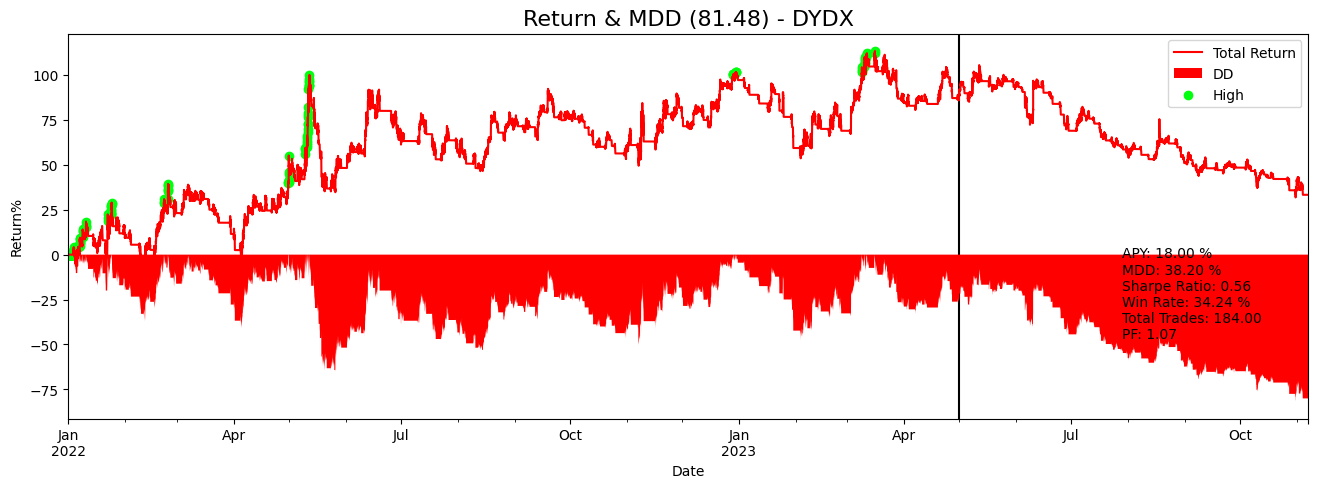

(None,
 Start                               2022-01-01 00:00:00
 End                                 2023-11-07 00:15:00
 Period                                675 days 00:30:00
 Start Value                                     10000.0
 Min Value                                   9200.011933
 Max Value                                  21331.846232
 End Value                                  13329.442914
 Total Return [%]                              33.294429
 Benchmark Return [%]                         -69.193034
 Total Time Exposure [%]                       50.794729
 Max Gross Exposure [%]                       109.747316
 Max Drawdown [%]                              38.196292
 Max Drawdown Duration                 235 days 23:30:00
 Total Orders                                        368
 Total Fees Paid                             1101.815983
 Total Trades                                        184
 Win Rate [%]                                   34.23913
 Best Trade [%]         

In [7]:
start = '2022-01-01'
sep = ''
end = ''

params = {"window_ma": 180.0,
        "multiplier": 2}

side = 'short'
config = {'freq':'15min', 'lag':1, 'fee': 0.0003,'weekend_filter':False}
coin = 'DYDX'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

<AxesSubplot:xlabel='Entry Index'>

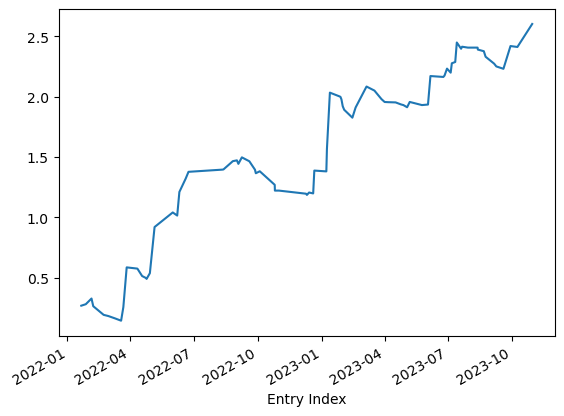

In [25]:
trades.index = trades['Entry Index']
trades['Return'].cumsum().plot()

======================= SOL BOTH Optimize Test =======================
Optimization trails: 150


100%|██████████| 150/150 [00:12<00:00, 11.60it/s]


Optimization time: 12.93 sec
---------- SOL BOTH ----------
{'window_ma': 104, 'multiplier': 4.0}
APY: 200.73 %
MDD: 24.18 %
MDD Duration 105 days 17:00:00
worst trade: -16.10 %
2023-01-25 02:00:00 ~ 2023-01-29 19:00:00
avg holding days: 6.25 days
--------------------------------------------
PF: 2.09
Sharpe Ratio: 2.09
Calmar Ratio: 6.84
Sortino Ratio: 3.14
Omega Ratio: 1.07
--------------------------------------------
Expectancy : 3.50 %
Total Time Exposure : 98.97 %
Total Trades: 77
Win Rate: 44.74 %
--------------------------------------------
PF * Win Rate: 0.933


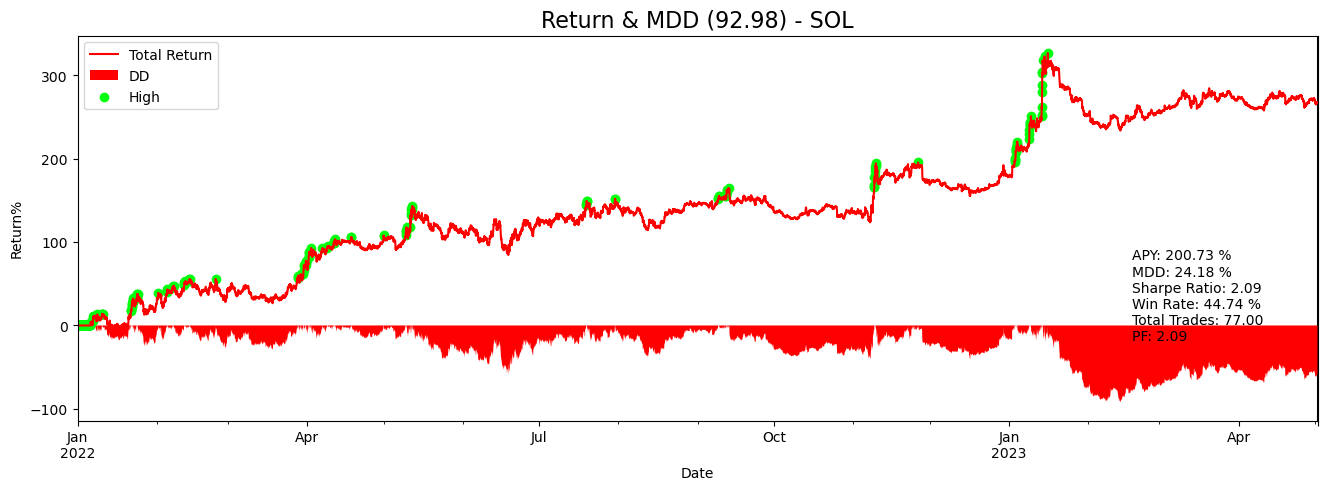

+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-03    |     80.18 | 10630.7  | -2717.02 |       3.91 |   50    |         12 |
| 2022-06    |     41.53 |  9529.17 | -5376.63 |       1.77 |   53.33 |         15 |
| 2022-09    |     15.14 |  5016.08 | -3501.77 |       1.43 |   46.67 |         15 |
| 2022-12    |     43.08 |  8904.77 | -4596.98 |       1.94 |   33.33 |         15 |
| 2023-03    |     89.52 | 15946.8  | -6994.64 |       2.28 |   46.15 |         13 |
| 2023-06    |     -1.69 |  1141.62 | -1310.44 |       0.87 |   42.86 |          7 |
+------------+-----------+----------+----------+------------+---------+------------+


In [4]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

symbol_list = ['']
sample_sets = [[start,end]]
freq = '1h'

params = {"window_ma": [20,120,4],
          "multiplier":[2, 5 ,0.5]}

config = {'freq':'1h','fee': 0.0003}
multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(['SOL'],sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)
